# Introduction
This is a quick PL early tutorial to become familiar with NEURON using Python.  Objectives:<br>
* Create a passive cell membrane in NEURON <br>
* Create a synaptic stimulus into the neuron <br>
* Modify parameters of the membrane and stimulus <br>
* Visualise results with Matplotlib <br>

This tutorial is based on https://neuron.yale.edu/neuron/static/docs/neuronpython/firststeps.html


In [2]:
#Import key functions from NEURON (TEST note)
from neuron import h, gui

# h is the interface moduel between Python and NEURON
# h provides both a direct interface into the NEURON library and function codebase and also an interface into NEuRON's other Interpreter language, hoc.

# Import the standard Python libraries


In [3]:
# import numpy as np (not needed here)
# import pandas as pd (not needed here)
# pip install scikit-learn (not needed here)
import matplotlib.pyplot as plt


# Create a cell
Create a basic model cell as a NEURON Section (The region of the neuron containing the nucleus is known as the cell body, soma, or perikaryon).

In [4]:
soma = h.Section(name='soma')

Need to see what has been created here.  Use the psection() ("print section") funtion

In [5]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

The results indicate that the soma is a cylinder with length 100 microns, diameter 500 microns, axial resistivity 35.4 ohm*centimetre and specific membrane capacitance 1uF/cm^2

It is also possible to use Python's dir() function to investigate objects

In [6]:
dir(soma)

['L',
 'Ra',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'disconnect',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'subtree',
 'trueparentseg',
 'uninsert',
 'wholetree',
 'x3d',
 'y3d',
 'z3d']

dir(soma) tells us all of the Python methods and variables associated with the object. Any methods with two leading and trailing underscores are reserved by Python and may or may not be implemented by the object. The other items in the list are additional members of soma that we can call. To see all of the functions available to the neuron variable h, we can call dir(h).

In [7]:
dir(h)

['APCount',
 'AlphaSynapse',
 'AtolTool',
 'AtolToolItem',
 'Avogadro_constant',
 'BBSaveState',
 'CVode',
 'DEG',
 'Deck',
 'E',
 'ExecCommand',
 'Exp2Syn',
 'ExpSyn',
 'FARADAY',
 'FInitializeHandler',
 'Family',
 'File',
 'GAMMA',
 'GUIMath',
 'Glyph',
 'Graph',
 'HBox',
 'IClamp',
 'Impedance',
 'Inserter',
 'IntFire1',
 'IntFire2',
 'IntFire4',
 'KSChan',
 'KSGate',
 'KSState',
 'KSTrans',
 'L',
 'LinearMechanism',
 'List',
 'Matrix',
 'MechanismStandard',
 'MechanismType',
 'MenuExplore',
 'NEURONMainMenu',
 'NetCon',
 'NetStim',
 'NumericalMethodPanel',
 'OClamp',
 'PHI',
 'PI',
 'PPShape',
 'PWManager',
 'ParallelContext',
 'PatternStim',
 'Plot',
 'PlotShape',
 'PointBrowser',
 'PointProcessLocator',
 'PointProcessManager',
 'PointProcessMark',
 'Pointer',
 'PtrVector',
 'PythonObject',
 'R',
 'Ra',
 'Random',
 'RangeVarPlot',
 'SEClamp',
 'SaveState',
 'Section',
 'SectionBrowser',
 'SectionList',
 'SectionRef',
 'Shape',
 'ShapeBrowser',
 'ShapeLocation',
 'SingleChan',
 'St

Objects can also be probed using 'help (object or variable)'.  For example (!):

In [8]:
help('APCount')

No Python documentation found for 'APCount'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



NEURON comes with built-in biophysical mechanisms that can be addred to a model: 
pas	Passive (“leak”) channel.
extracellular	For simulating effects of nonzero extracellular potential, as may happen with leaky patch clamps, or detailed propertes of the myelin sheath.
hh	Hodgkin-Huxley sodium, potassium, and leakage channels. 


# Insert a passive mechanism
We see from the list of elements after calling dir(soma) that insert is available. This is the method we will use to insert mechanisms into the membrane. Let’s insert a passive leak conductance across the membrane and do this by passing ‘pas’ as the mechanism type:

In [9]:
soma.insert('pas')

soma

# Sections and segments
A NEURON Section is considered a piece of cylindrical cable. Depending on the resolution desired, it may be necessary to divide the cable into a number of segments where voltage varies linearly between centers of adjacent segments. The number of segments within a section is given by the variable, nseg. The total ionic current across the segment membrane is approximately the area of the segment multiplied by the ionic current density at the center of the segment. To access a part of the section, specify a value between 0 and 1, where 0 is typically the end closest to the soma and 1 is the distal end. Because nseg divides the cable into equal-length parts, it should be an odd number so that to address the middle of the cable, (0.5), gives the middle segment.

To summarize, we access sections by their name and segments by some location on the section.

Section: section
Segment: section(loc)
Using the Python type() function can tell us what a variable is:

In [10]:
print("type(soma) = {}".format(type(soma)))
print("type(soma(0.5)) ={}".format(type(soma(0.5))))

type(soma) = <class 'nrn.Section'>
type(soma(0.5)) =<class 'nrn.Segment'>


# Accessing segment variables
Segment variables follow the format:

section(loc).var
And for mechanisms on the segment:

section(loc).mech.var
or

section(loc).var_mech

Use the first one for consistency.  Dots between parts.

In [11]:
mech = soma(0.5).pas
print(dir(mech))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'e', 'g', 'i', 'is_ion', 'name', 'segment']


In [12]:
print(mech.g)
print(soma(0.5).pas.g)

0.001
0.001


# Insert an alpha synapse
Let’s insert an AlphaSynapse object onto the soma to induce some membrane dynamics.


In [13]:
asyn = h.AlphaSynapse(soma(0.5))

AlphaSynapse is a Point Process. Point processes are point sources of current. When making a new PointProcess, you pass the segment to which it will bind.

Again, with dir() function, we can validate that asyn is an object and contains some useful parameters. Let’s look at some of those parameters.

In [14]:
dir(asyn)

['__abs__',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 'alpha',
 'baseattr',
 'e',
 'get_loc',
 'get_segment',
 'gmax',
 'has_loc',
 'hname',
 'hocobjptr',
 'i',
 'loc',
 'onset',
 'same',
 'tau']

In [15]:
print("asyn.e = {}".format(asyn.e))
print("asyn.gmax = {}".format(asyn.gmax))
print("asyn.onset = {}".format(asyn.onset))
print("asyn.tau = {}".format(asyn.tau))

asyn.e = 0.0
asyn.gmax = 0.0
asyn.onset = 0.0
asyn.tau = 0.1


Let’s assign the onset of this synapse to occur at 20 ms and the maximal conductance to 1.

In [16]:
asyn.onset = 20
asyn.gmax = 1

Now look at the state of the neuron usign the psection()

In [17]:
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
	insert pas { g_pas=0.001 e_pas=-70}
	insert AlphaSynapse { onset=20 tau=0.1 gmax=1 e=0}
}


1.0

# Set up recording variables.
The cell should be configured to run a simulation. However, we need to set up variables we wish to record from the simulation. For now, we will record the membrane potential, which is soma(0.5).v. References to variables are available as _ref_rangevariable.

In [18]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[4]

# Run the simulation
Execute the following

In [19]:
h.tstop = 40.0
h.run()

0.0

Note If we had not included gui in the list of things to import, we would have also had to execute:
h.load_file('stdrun.hoc')
which defines the run() function (the alternative would be to specify initialization and advance in more detail).

# Plot the results
Using matplotlib

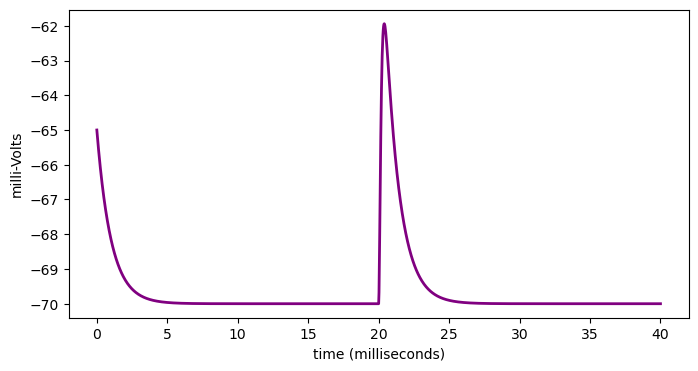

In [20]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)  - Why??
pyplot.plot(t_vec, v_vec, color = 'purple', linewidth = 2)
pyplot.xlabel('time (milliseconds)')
pyplot.ylabel('milli-Volts')
pyplot.show()